In [3]:
#importing libraries
import geopandas
import pandas
import numpy
import matplotlib
import matplotlib.pyplot as mplot
import mapclassify
import warnings
warnings.filterwarnings('ignore')

In [4]:
#import country Map
countriesDF = geopandas.read_file('ne_50m_admin_0_countries.shp')
countriesDF = countriesDF[['ADMIN','SOV_A3','geometry']]
countriesDF = countriesDF.rename(columns={'ADMIN':'CountryName', 'SOV_A3':'Abbrev'})
countriesDF.sort_values(by=['CountryName'], ignore_index=True, inplace=True)
countriesDF = countriesDF.replace(to_replace='United States of America', value='United States')
countriesDF

,CountryName,Abbrev,geometry
0,Afghanistan,AFG,"POLYGON ((66.52227 37.34849, 66.82773 37.37129..."
1,Aland,FI1,"MULTIPOLYGON (((19.98955 60.35117, 20.02021 60..."
2,Albania,ALB,"POLYGON ((19.34238 41.86909, 19.34551 41.91885..."
3,Algeria,DZA,"POLYGON ((8.57656 36.93721, 8.59766 36.88389, ..."
4,American Samoa,US1,"POLYGON ((-170.72627 -14.35117, -170.76924 -14..."
...,...,...,...
237,Western Sahara,SAH,"POLYGON ((-8.81777 27.65591, -8.81782 27.65645..."
238,Yemen,YEM,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."
239,Zambia,ZMB,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
240,Zimbabwe,ZWE,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."


In [5]:
#import the sustainability data

sustainabilityDF = pandas.read_csv("WorldSustainabilityDataset.csv")
sustainabilityDF.dtypes

Country Name                                                                                     object
Country Code                                                                                     object
Year                                                                                              int64
Access to electricity (% of population) - EG.ELC.ACCS.ZS                                        float64
Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG                float64
Adjusted net savings, excluding particulate emission damage (% of GNI) - NY.ADJ.SVNX.GN.ZS      float64
Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS                          float64
Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS                    float64
Adjusted savings: net forest depletion (% of GNI) - NY.ADJ.DFOR.GN.ZS                           float64
Adjusted savings: particulate emission damage (% of GNI) - NY.AD

In [7]:
#slice for the GINI index, the ratio for income equality

giniDF = sustainabilityDF[['Country Name','Country Code','Year',"Gini index (World Bank estimate) - SI.POV.GINI","World Regions (UN SDG Definition)"]]
giniDF.dtypes


Country Name                                       object
Country Code                                       object
Year                                                int64
Gini index (World Bank estimate) - SI.POV.GINI    float64
World Regions (UN SDG Definition)                  object
dtype: object

In [20]:
giniDF = giniDF.dropna()
giniDF

,Country Name,Country Code,Year,Gini index (World Bank estimate) - SI.POV.GINI,World Regions (UN SDG Definition)
19,Angola,AGO,2000,52.0,Sub-Saharan Africa
27,Angola,AGO,2008,42.7,Sub-Saharan Africa
37,Angola,AGO,2018,51.3,Sub-Saharan Africa
40,Albania,ALB,2002,31.7,Europe and Northern America
43,Albania,ALB,2005,30.6,Europe and Northern America
...,...,...,...,...,...
3255,Zambia,ZMB,2006,54.6,Sub-Saharan Africa
3259,Zambia,ZMB,2010,55.6,Sub-Saharan Africa
3264,Zambia,ZMB,2015,57.1,Sub-Saharan Africa
3279,Zimbabwe,ZWE,2011,43.2,Sub-Saharan Africa


In [17]:
#create longitude and latitude df

longLatDF = pandas.read_csv("world_country_and_usa_states_latitude_and_longitude_values.csv")
longLatDF = longLatDF[['country_code','latitude','longitude','country',]]
longLatDF = longLatDF.rename(columns={'country':'Country Name'})
longLatDF.set_index('Country Name', inplace=True)
longLatDF

,country_code,latitude,longitude
Country Name,,,
Andorra,AD,42.546245,1.601554
United Arab Emirates,AE,23.424076,53.847818
Afghanistan,AF,33.939110,67.709953
Antigua and Barbuda,AG,17.060816,-61.796428
Anguilla,AI,18.220554,-63.068615
...,...,...,...
Yemen,YE,15.552727,48.516388
Mayotte,YT,-12.827500,45.166244
South Africa,ZA,-30.559482,22.937506


In [23]:
#join longLatDF to giniDF
joinedGiniDF = pandas.merge(longLatDF, giniDF, on='Country Name', how='inner')
joinedGiniDF = joinedGiniDF.drop('country_code', axis=1)
joinedGiniDF = joinedGiniDF.rename(columns={'Gini index (World Bank estimate) - SI.POV.GINI':'Gini Index'})
joinedGiniDF

,Country Name,latitude,longitude,Country Code,Year,Gini Index,World Regions (UN SDG Definition)
0,United Arab Emirates,23.424076,53.847818,ARE,2013,32.5,Northern Africa and Western Asia
1,United Arab Emirates,23.424076,53.847818,ARE,2018,26.0,Northern Africa and Western Asia
2,Albania,41.153332,20.168331,ALB,2002,31.7,Europe and Northern America
3,Albania,41.153332,20.168331,ALB,2005,30.6,Europe and Northern America
4,Albania,41.153332,20.168331,ALB,2008,30.0,Europe and Northern America
...,...,...,...,...,...,...,...
1177,Zambia,-13.133897,27.849332,ZMB,2006,54.6,Sub-Saharan Africa
1178,Zambia,-13.133897,27.849332,ZMB,2010,55.6,Sub-Saharan Africa
1179,Zambia,-13.133897,27.849332,ZMB,2015,57.1,Sub-Saharan Africa
1180,Zimbabwe,-19.015438,29.154857,ZWE,2011,43.2,Sub-Saharan Africa


In [24]:
#modifying datatypes
joinedGiniDF.dtypes

Country Name                          object
latitude                             float64
longitude                            float64
Country Code                          object
Year                                   int64
Gini Index                           float64
World Regions (UN SDG Definition)     object
dtype: object

In [25]:
#ploting the giniDF and creating a map in a point format
geometry = geopandas.points_from_xy(joinedGiniDF.longitude,joinedGiniDF.latitude)
geoGiniDF = geopandas.GeoDataFrame(joinedGiniDF[['Year','Country Name','Gini Index','longitude','latitude']],geometry=geometry)
geoGiniDF

,Year,Country Name,Gini Index,longitude,latitude,geometry
0,2013,United Arab Emirates,32.5,53.847818,23.424076,POINT (53.84782 23.42408)
1,2018,United Arab Emirates,26.0,53.847818,23.424076,POINT (53.84782 23.42408)
2,2002,Albania,31.7,20.168331,41.153332,POINT (20.16833 41.15333)
3,2005,Albania,30.6,20.168331,41.153332,POINT (20.16833 41.15333)
4,2008,Albania,30.0,20.168331,41.153332,POINT (20.16833 41.15333)
...,...,...,...,...,...,...
1177,2006,Zambia,54.6,27.849332,-13.133897,POINT (27.84933 -13.13390)
1178,2010,Zambia,55.6,27.849332,-13.133897,POINT (27.84933 -13.13390)
1179,2015,Zambia,57.1,27.849332,-13.133897,POINT (27.84933 -13.13390)
1180,2011,Zimbabwe,43.2,29.154857,-19.015438,POINT (29.15486 -19.01544)


In [26]:
#display year ranges
uniqueYears = geoGiniDF['Year'].unique()
print(uniqueYears)

[2013 2018 2002 2005 2008 2012 2014 2015 2016 2017 2001 2003 2004 2006
 2007 2009 2010 2011 2000]


Text(0.5, 1.0, 'Gini Index 2000-2018')

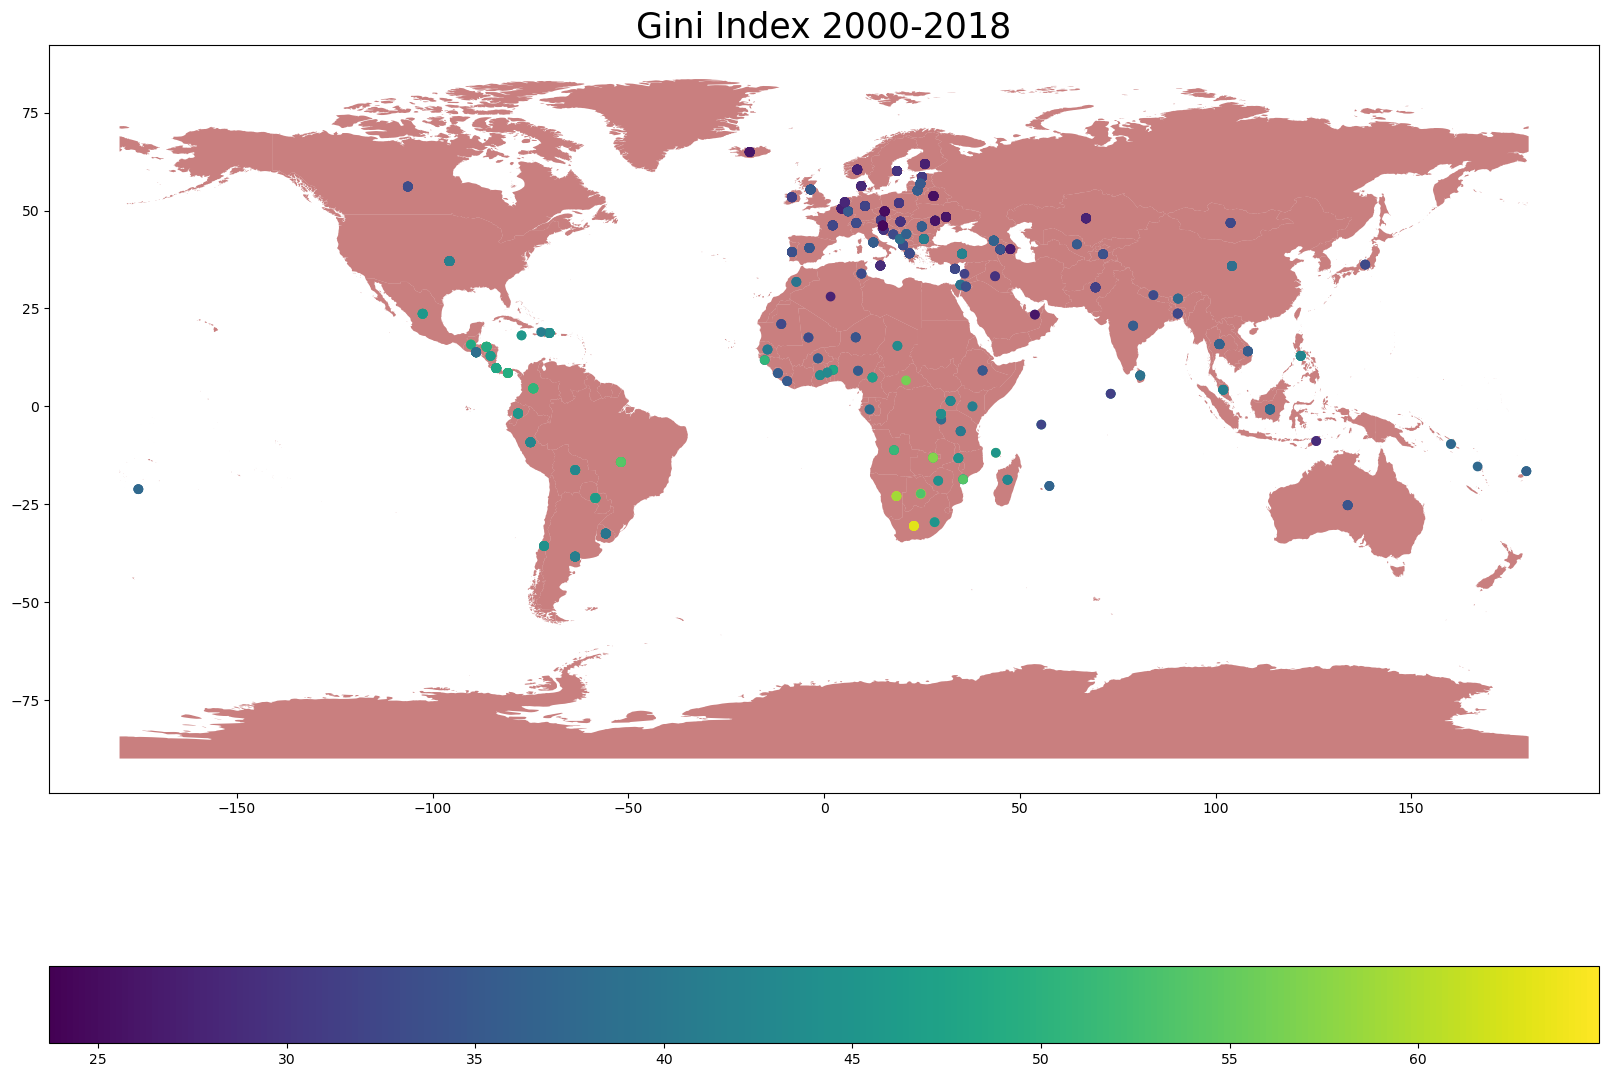

In [30]:
#ploting the map and points
displayFigure = mplot.figure(figsize=(20,15))
displayAxis = displayFigure.add_subplot()
countriesDF.plot(ax=displayAxis,alpha=0.6,color='brown')
geoGiniDF.plot(column='Gini Index',
              ax=displayAxis,
              legend=True,
              legend_kwds={'orientation':'horizontal'}
              )
displayAxis.set_title('Gini Index 2000-2018',fontsize=25)

In [34]:
#specifying the mapvariable based on year
years =numpy.sort(numpy.unique(geoGiniDF.Year))
#saving files as pngs for each unique year to create gif animation
numberOfPngs = 0
for year in years:
    if year > 0:
        displayFigure = mplot.figure(figsize=(20,15))
        displayAxis = displayFigure.add_subplot()
        countriesDF.plot(ax=displayAxis,alpha=0.6,color='brown')
        displayAxis.set_axis_off()
        
        geoGiniByYearDF = geoGiniDF[geoGiniDF.Year == year]
        geoGiniByYearDF.plot(column='Gini Index', ax=displayAxis)
        title = 'Gini Index in ' + str(year)
        displayAxis.set_title(title,fontsize=25, color = 'green', fontweight= 'bold')
        displayFigure.savefig('Year' + str(year) + '.png', dpi = 200, format ='png')
        numberOfPngs +=1
        mplot.close()
        
print("Total number of png plots created:", numberOfPngs)

Total number of png plots created: 19


In [38]:
#animating the plot with converted pngs into gifs
from PIL import Image
import glob
allPngPics = []
giniImages = glob.glob("Year*.png")
for pic in giniImages:
    giniPNG = Image.open(pic)
    allPngPics.append(giniPNG)
    
allPngPics[0].save('GiniByYear.gif', format='GIF',
                  append_images=allPngPics[1:],
                  save_all=True, duration=1000, loop=0)
print("GiniByYear.gif file created.")

GiniByYear.gif file created.
